In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
test= pd.read_csv('https://raw.githubusercontent.com/pankush9096/Stock-Prediction-using-LSTM/master/Price_Test.csv')
train= pd.read_csv('https://raw.githubusercontent.com/pankush9096/Stock-Prediction-using-LSTM/master/Price_Train.csv')

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:

#taking open price from data in 2d array , if we will do train.loc[:, 'open'].values it gives one d array which wont
#be considered in scaling
train_open= train.iloc[:, 1:2].values

In [ ]:
#Scaling the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
train_open_scaled= ss.fit_transform(train_open)

In [ ]:
train_open_scaled[60]

array([0.08627874])

In [ ]:
# Feature selection
xtrain=[]
ytrain=[]
for i in range(60,len(train_open_scaled)):
    xtrain.append(train_open_scaled[i-60:i,0])
    ytrain.append(train_open_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [ ]:
#Reshaping the train data to make it as input for LTSM layer input_shape(batchzise,timesteps,input_dim)
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [ ]:
xtrain.shape

(1198, 60, 1)

Building LSTM Network

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
#initialisizng the model 
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
40/40 [==============================] - 11s 107ms/step - loss: 0.0822
Epoch 2/100
40/40 [==============================] - 4s 105ms/step - loss: 0.0084
Epoch 3/100
40/40 [==============================] - 4s 104ms/step - loss: 0.0056
Epoch 4/100
40/40 [==============================] - 4s 105ms/step - loss: 0.0050
Epoch 5/100
40/40 [==============================] - 4s 106ms/step - loss: 0.0049
Epoch 6/100
40/40 [==============================] - 4s 105ms/step - loss: 0.0051
Epoch 7/100
40/40 [==============================] - 4s 105ms/step - loss: 0.0045
Epoch 8/100
40/40 [==============================] - 4s 106ms/step - loss: 0.0047
Epoch 9/100
40/40 [==============================] - 4s 106ms/step - loss: 0.0051
Epoch 10/100
40/40 [==============================] - 4s 106ms/step - loss: 0.0050
Epoch 11/100
40/40 [==============================] - 4s 106ms/step - loss: 0.0040
Epoch 12/100
40/40 [==============================] - 4s 108ms/step - loss: 0.0040
Epoch 13/100

Predicting for Test Data

In [ ]:
test_open= test.iloc[:, 1:2].values #taking  open price
total= pd.concat([train['Open'],test['Open']],axis=0) # Concating train and test and then will take last 60 train point
test_input = total[len(total)-len(test)-60:].values
test_input= test_input.reshape(-1,1) # reshaping it to get it transformed
test_input= ss.transform(test_input)

In [ ]:
xtest= []
for i in range(60,80):
    xtest.append(test_input[i-60:i,0]) #creating input for lstm prediction

In [ ]:
xtest= np.array(xtest)

In [ ]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

In [ ]:
predicted_value= ss.inverse_transform(predicted_value)

Plotting the data

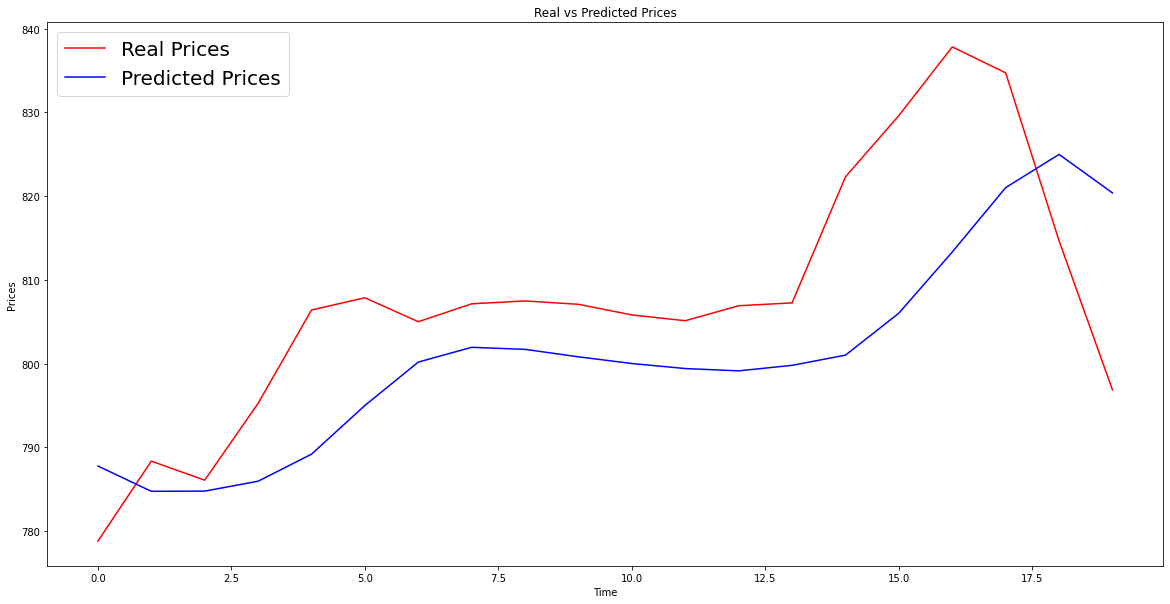

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor


In [ ]:
def reg(optimizer):
    #initialisizng the model 
    regression= Sequential()

    #First Input layer and LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
    regression.add(Dropout(0.2))

    # Second LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer= 'glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Third LSTM layer with 0.2% dropout
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
    regression.add(Dropout(0.2))

    #Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
    regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
    regression.add(Dropout(0.2))
    #Output layer , we wont pass any activation as its continous value model
    regression.add(Dense(units=1))

    #Compiling the network
    regression.compile(optimizer=optimizer,loss='mean_squared_error')
    
    return regression

model= KerasRegressor(build_fn=reg)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'batch_size': [50, 32],
              'epochs': [50, 25],
              'optimizer': ['adam', 'rmsprop','sgd','adadelta']}
grid_search = RandomizedSearchCV(estimator = model,param_distributions=parameters,n_iter=5)
# fitting the model and Calculating the best parameters.
grid_search = grid_search.fit(xtrain, ytrain)
best_parameters = grid_search.best_params_

Epoch 1/50
20/20 [==============================] - 9s 127ms/step - loss: 0.2055
Epoch 2/50
20/20 [==============================] - 3s 136ms/step - loss: 0.0394
Epoch 3/50
20/20 [==============================] - 3s 138ms/step - loss: 0.0355
Epoch 4/50
20/20 [==============================] - 3s 138ms/step - loss: 0.0364
Epoch 5/50
20/20 [==============================] - 3s 137ms/step - loss: 0.0334
Epoch 6/50
20/20 [==============================] - 3s 140ms/step - loss: 0.0299
Epoch 7/50
20/20 [==============================] - 3s 141ms/step - loss: 0.0265
Epoch 8/50
20/20 [==============================] - 3s 139ms/step - loss: 0.0249
Epoch 9/50
20/20 [==============================] - 3s 145ms/step - loss: 0.0216
Epoch 10/50
20/20 [==============================] - 3s 147ms/step - loss: 0.0205
Epoch 11/50
20/20 [==============================] - 3s 148ms/step - loss: 0.0170
Epoch 12/50
20/20 [==============================] - 3s 149ms/step - loss: 0.0158
Epoch 13/50
20/20 [======

In [ ]:
model=grid_search.best_estimator_.fit(xtrain,ytrain)

Epoch 1/50
24/24 [==============================] - 9s 132ms/step - loss: 0.1060
Epoch 2/50
24/24 [==============================] - 3s 134ms/step - loss: 0.0156
Epoch 3/50
24/24 [==============================] - 3s 128ms/step - loss: 0.0160
Epoch 4/50
24/24 [==============================] - 3s 128ms/step - loss: 0.0112
Epoch 5/50
24/24 [==============================] - 3s 128ms/step - loss: 0.0131
Epoch 6/50
24/24 [==============================] - 3s 130ms/step - loss: 0.0109
Epoch 7/50
24/24 [==============================] - 3s 130ms/step - loss: 0.0094
Epoch 8/50
24/24 [==============================] - 3s 128ms/step - loss: 0.0129
Epoch 9/50
24/24 [==============================] - 3s 127ms/step - loss: 0.0086
Epoch 10/50
24/24 [==============================] - 3s 128ms/step - loss: 0.0071
Epoch 11/50
24/24 [==============================] - 3s 128ms/step - loss: 0.0114
Epoch 12/50
24/24 [==============================] - 3s 129ms/step - loss: 0.0079
Epoch 13/50
24/24 [======

In [ ]:
model

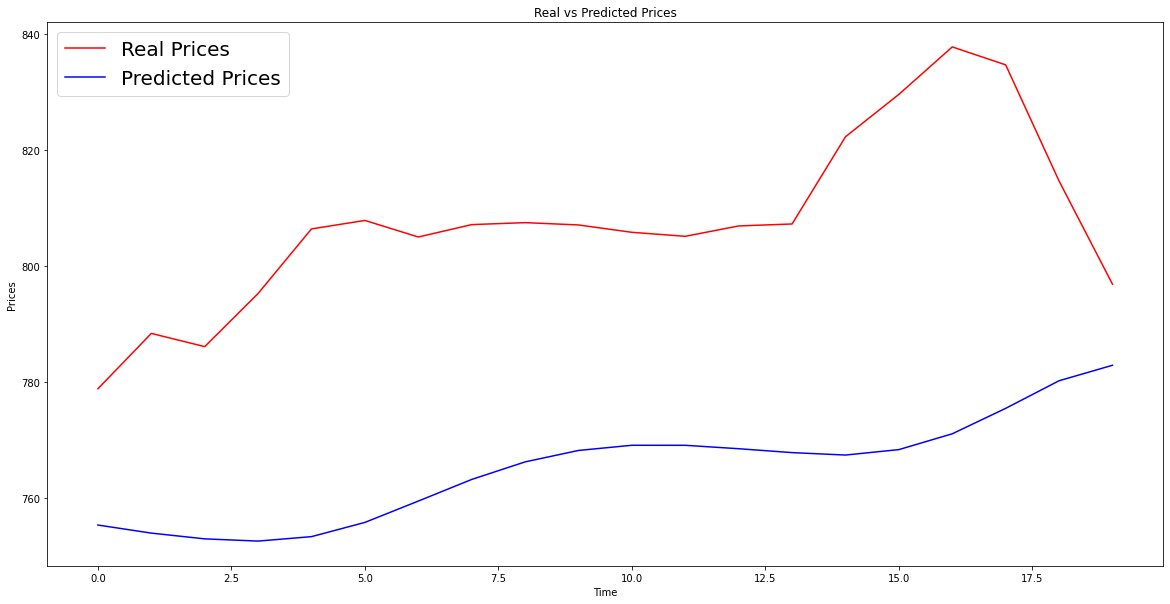

In [ ]:
predicted_value= grid_search.predict(xtest)
predicted_value= ss.inverse_transform(predicted_value.reshape(-1,1))


plt.figure(figsize=(20,10))
plt.plot(test_open,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)